In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv')

In [20]:
df.shape

(768, 9)

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 수치형 변수를 범주형 변수로 만들기

In [22]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


In [23]:
# One-Hot-Encoding
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >= 25)&(df['Age']<=60)
df['Age_high'] = df['Age']>60

df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot:xlabel='Age_low', ylabel='count'>

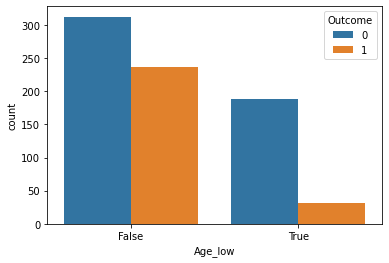

In [24]:
sns.countplot(data=df, x='Age_low', hue="Outcome")

## 결측치 다루기

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [26]:
# min을 보면 0이 나오면 안되는 값이 0이 나온 것을 확인할 수 있음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)
df[['Insulin', 'Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [28]:
df['Insulin_nan'].isnull().sum() # 374
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [29]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

C:\Users\wkddn\AppData\Local\Temp/ipykernel_30592/368444390.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [30]:
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 68.7
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 100.3


C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

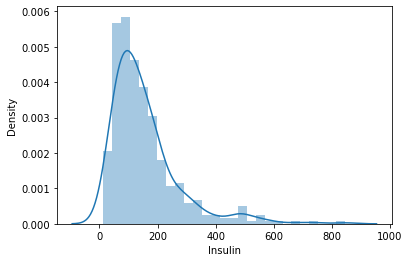

In [31]:
sns.distplot(df.loc[df['Insulin']>0, 'Insulin'])

In [32]:
split_count = int(df.shape[0]*0.8)
split_count

614

In [33]:
train = df[:split_count].copy()
train.shape

(614, 14)

In [34]:
test = df[split_count:].copy()
test.shape

(154, 14)

In [35]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove('Outcome')
feature_names.remove('Age')
feature_names.remove('Insulin')

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high',
 'Insulin_nan']

In [36]:
label_name = 'Outcome'
label_name

'Outcome'

In [37]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 10)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan
0,148,72,35,33.6,0.627,False,False,True,False,100.3
1,85,66,29,26.6,0.351,False,False,True,False,68.7
2,183,64,0,23.3,0.672,True,False,True,False,100.3
3,89,66,23,28.1,0.167,False,True,False,False,94.0
4,137,40,35,43.1,2.288,False,False,True,False,168.0


In [38]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [39]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 10)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan
614,138,74,26,36.1,0.557,True,False,True,False,144.0
615,106,72,0,25.8,0.207,False,False,True,False,68.7
616,117,96,0,28.7,0.157,False,False,True,False,68.7
617,68,62,13,20.1,0.257,False,True,False,False,15.0
618,112,82,24,28.2,1.282,True,False,True,False,100.3


In [40]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

<AxesSubplot:>

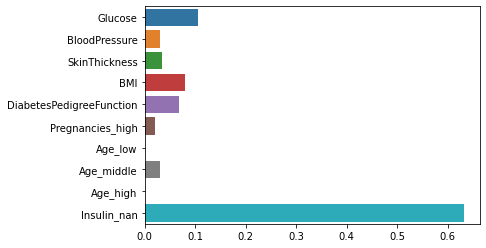

In [44]:
sns.barplot(x=model.feature_importances_, y=feature_names)

[Text(155.86442307692306, 212.49818181818182, 'Insulin_nan <= 95.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(83.7, 202.61454545454546, 'SkinThickness <= 58.5\ngini = 0.068\nsamples = 311\nvalue = [300, 11]'),
 Text(75.11538461538461, 192.73090909090908, 'Insulin_nan <= 87.5\ngini = 0.062\nsamples = 310\nvalue = [300, 10]'),
 Text(38.63076923076923, 182.84727272727272, 'Insulin_nan <= 36.5\ngini = 0.04\nsamples = 293\nvalue = [287, 6]'),
 Text(17.16923076923077, 172.96363636363637, 'BloodPressure <= 81.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(8.584615384615384, 163.07999999999998, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(25.753846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(60.09230769230769, 172.96363636363637, 'DiabetesPedigreeFunction <= 1.294\ngini = 0.028\nsamples = 283\nvalue = [279, 4]'),
 Text(42.92307692307692, 163.07999999999998, 'DiabetesPedigreeFunction <= 0.509\ngini = 0.021\nsamples = 279\nvalue = [2

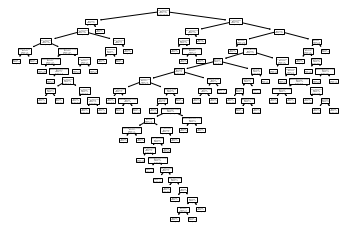

In [45]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

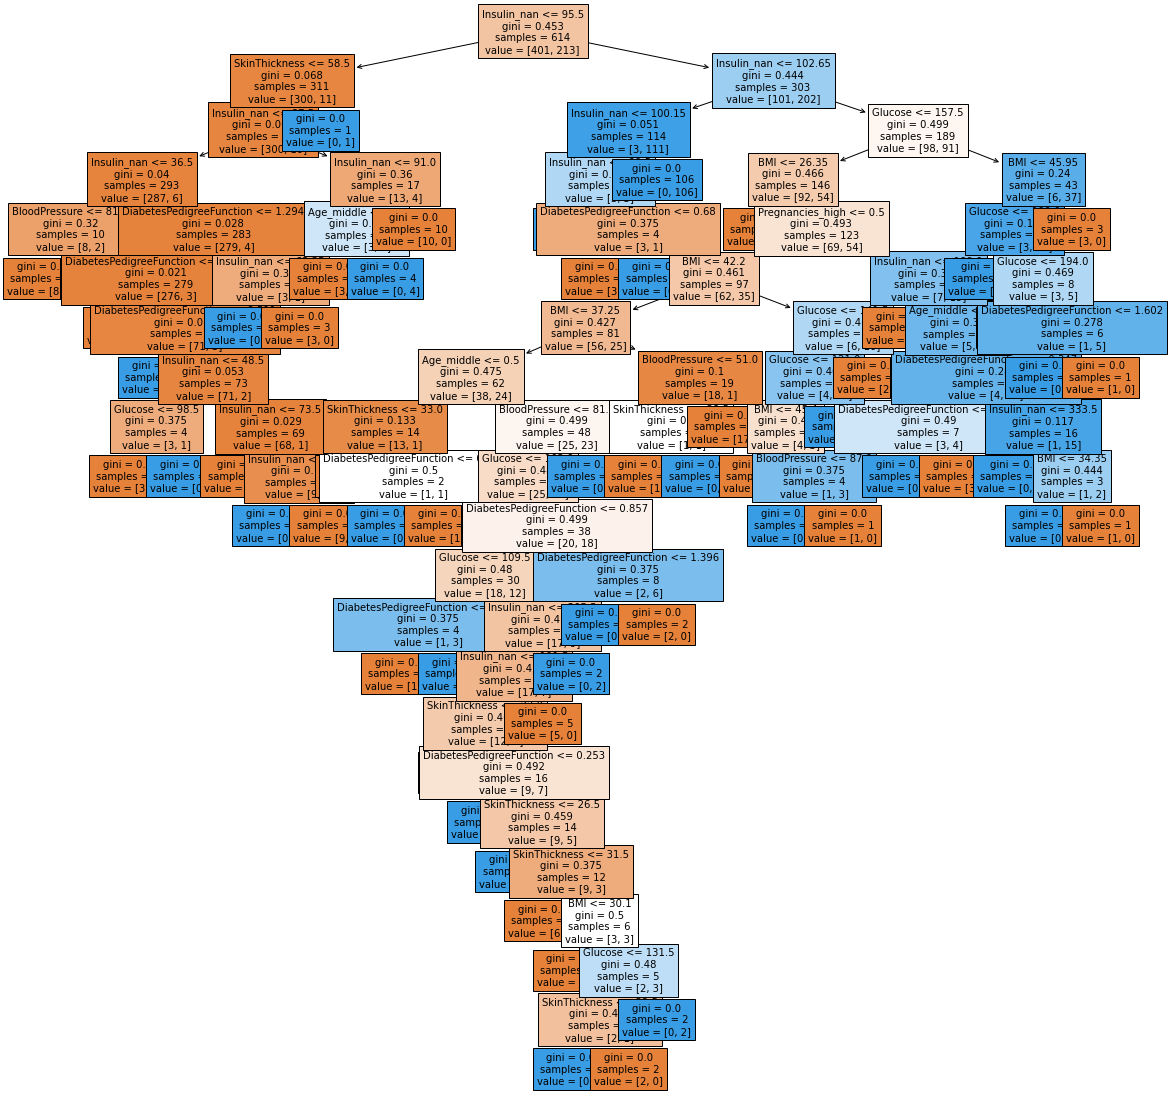

In [46]:
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                filled=True,
                fontsize=10)

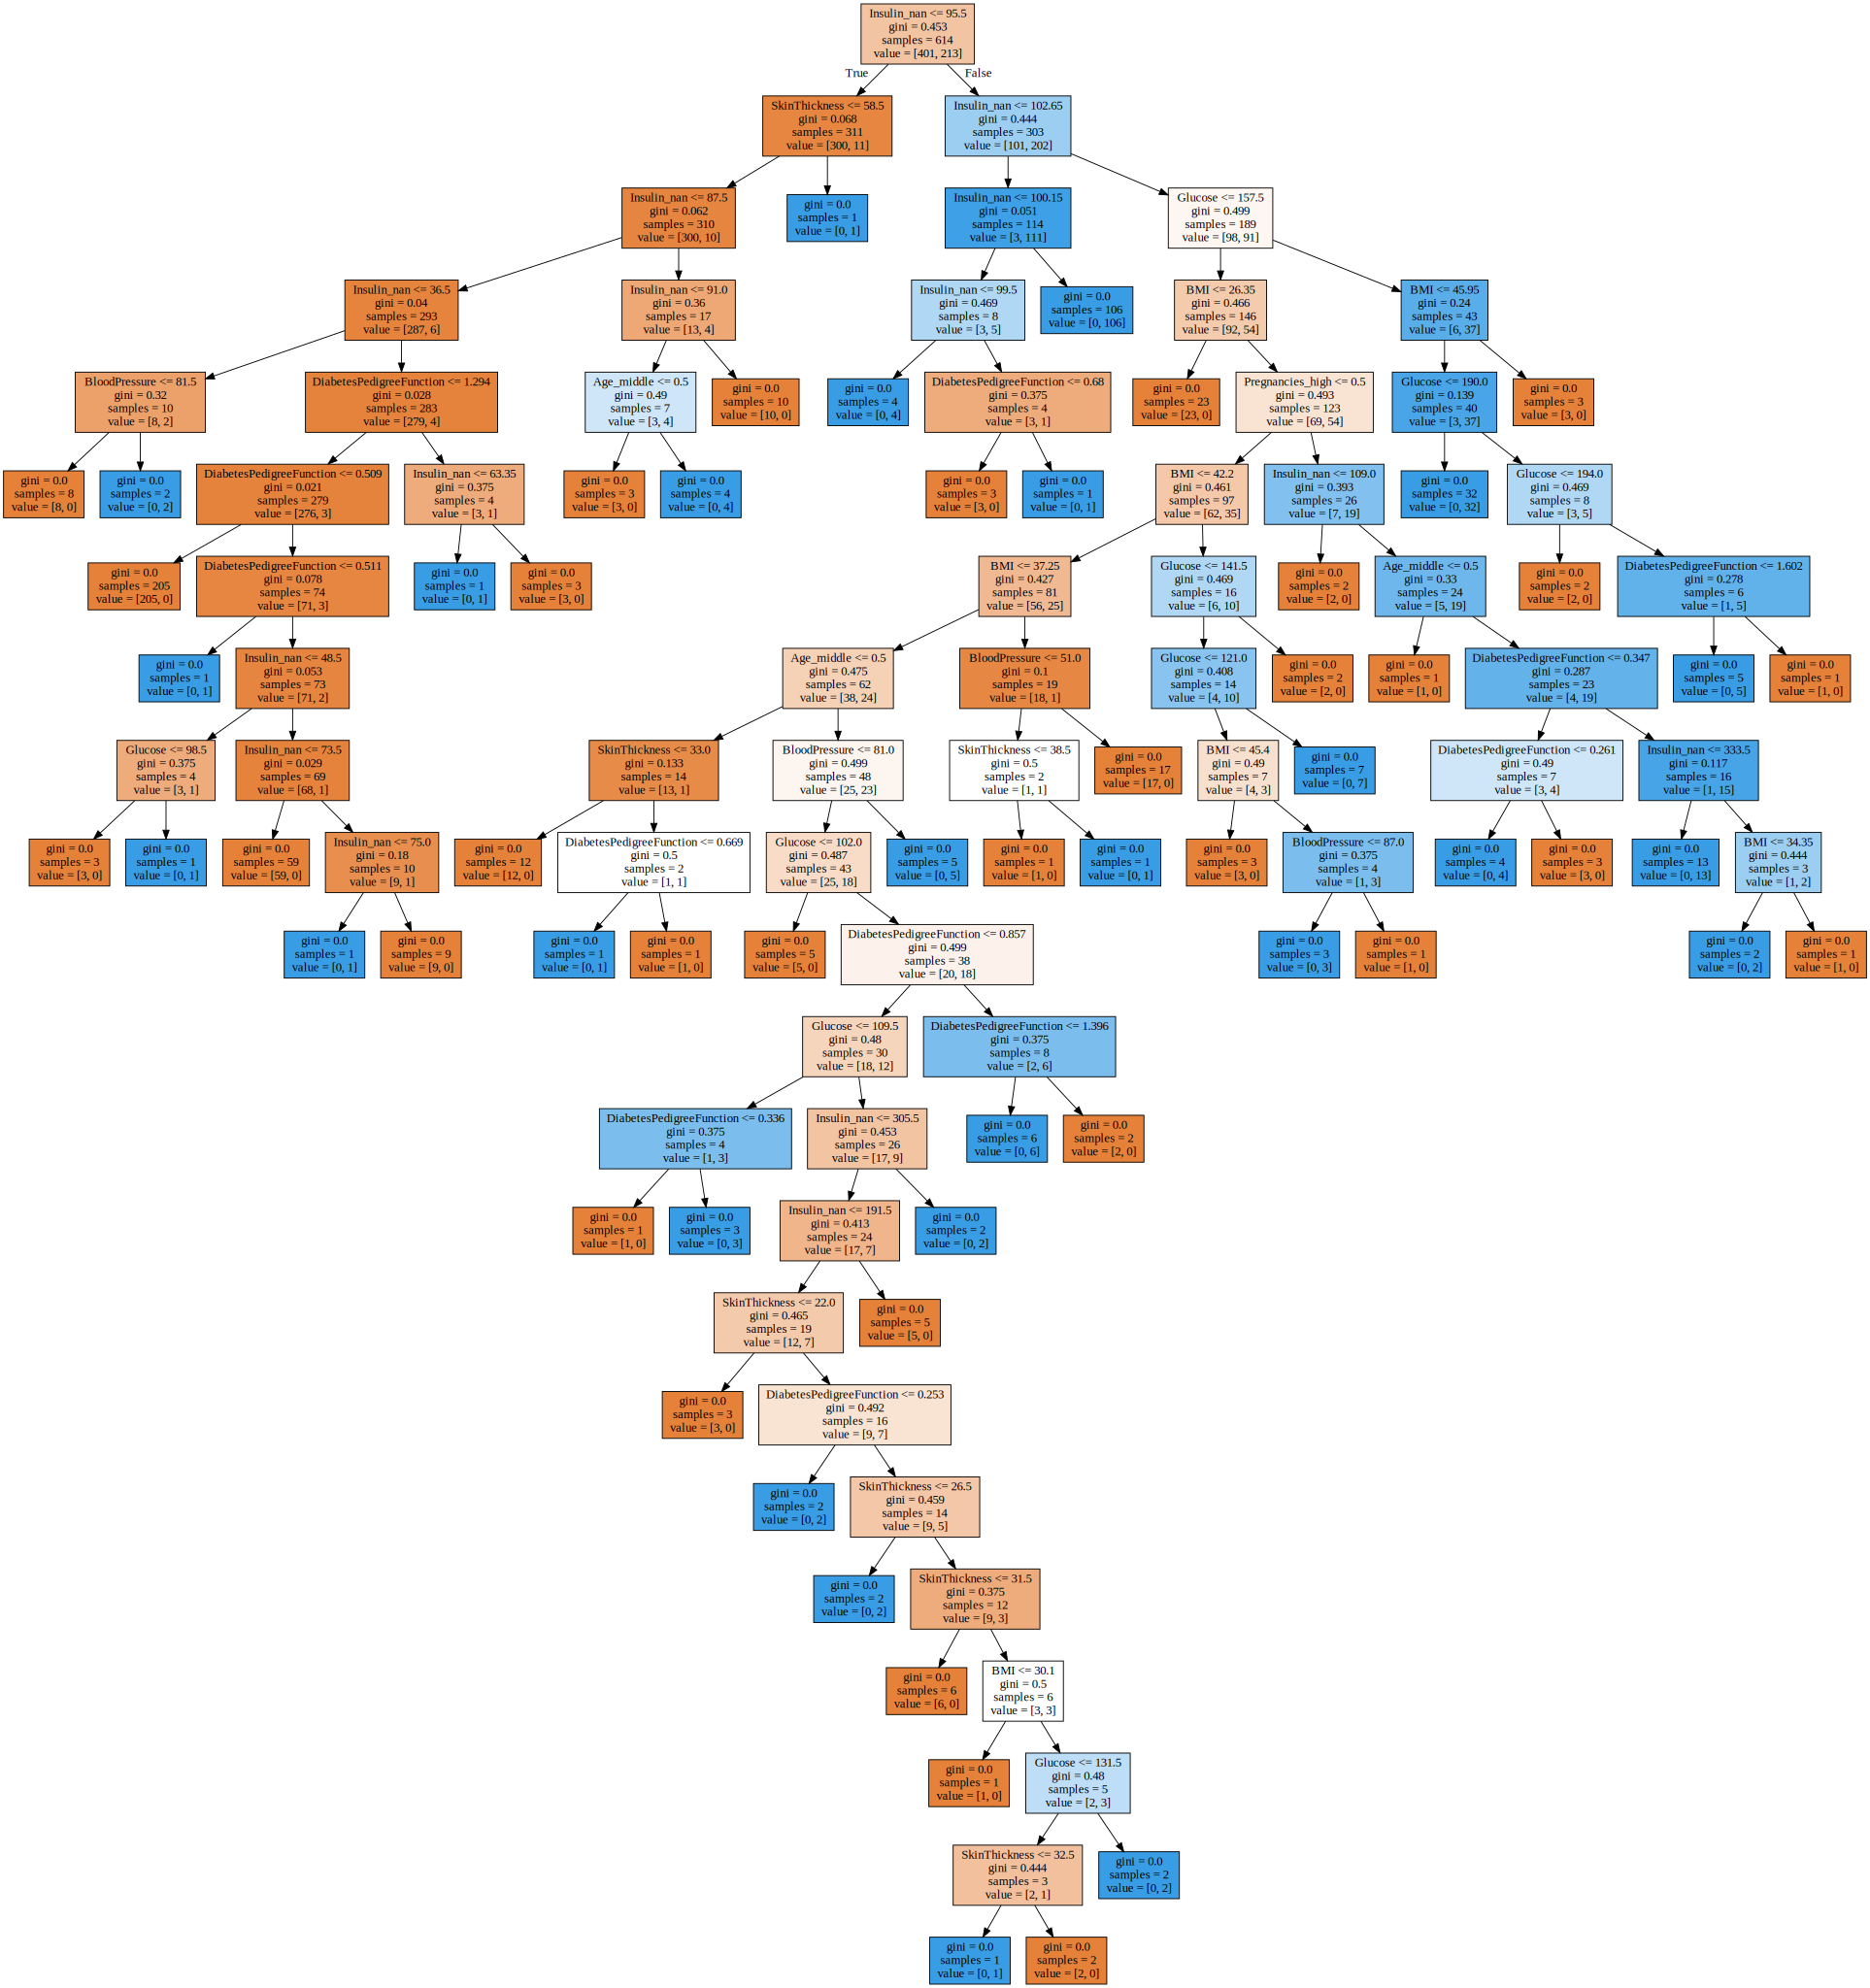

In [47]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names= feature_names,filled=True)
graphviz.Source(dot_tree)

In [48]:
model.feature_importances_

array([0.10648136, 0.03099307, 0.03397757, 0.07920074, 0.06789876,
       0.0201724 , 0.        , 0.02997798, 0.        , 0.63129812])

<AxesSubplot:>

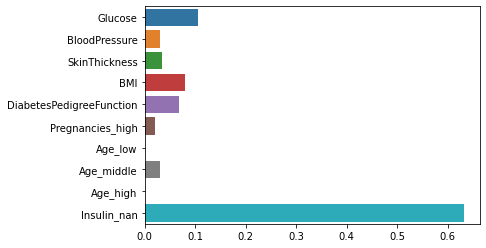

In [49]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [50]:
diff_count = abs(y_test-y_predict).sum()
diff_count

16

In [51]:
# 전체에서 10%를 틀렸음을 알 수 있음
abs(y_test-y_predict).sum() / len(y_test) * 100

10.38961038961039

In [52]:
# 예측도
(len(y_test)-diff_count) / len(y_test) * 100

89.6103896103896

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8961038961038961

In [54]:
model.score(X_test, y_test) * 100

89.6103896103896

C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

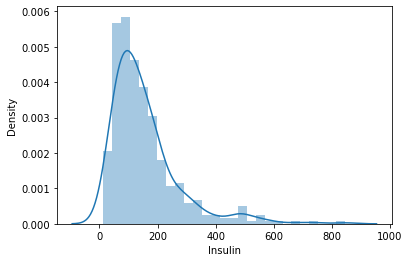

In [55]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

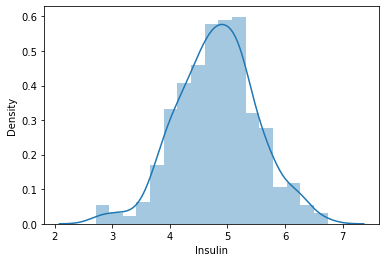

In [56]:
# log 변환
# 0 이하에서는 음이 무한대 값에 수렴하므로 +1 해줌
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

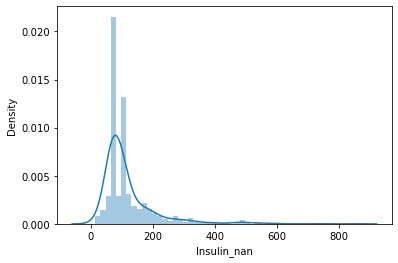

In [57]:
sns.distplot(df['Insulin_nan'])

C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

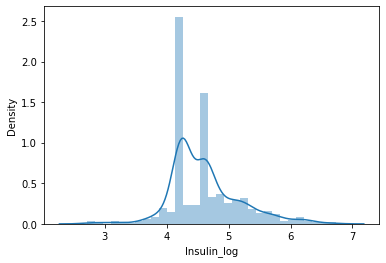

In [58]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

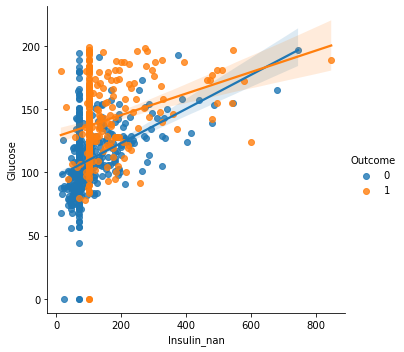

In [59]:
# Insulin과 Glucose가 상관관계가 있는지 확인
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [60]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [61]:
# Outcome과 low_glu_insulin의 관계 확인
# low_glu_insulin이 True인 값의 발병 확률은 매우 낮음
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,255,13


In [63]:
diff_count = abs(y_test-y_predict).sum()
diff_count

16

In [64]:
(len(y_test) - diff_count) / len(y_test) * 100

89.6103896103896

C:\Users\wkddn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_nan'>

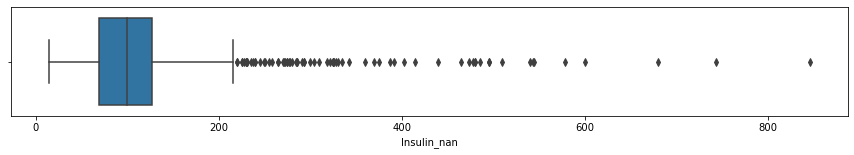

In [65]:
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin_nan'])

In [66]:
df["Insulin_nan"].describe()

count    768.000000
mean     118.933073
std       93.574371
min       14.000000
25%       68.700000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_nan, dtype: float64

In [67]:
# IQR 값 구하기
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR


58.55

In [68]:
# 600 이상이 되는 데이터를 제거한다는 결정
OUT = IQR3 + (IQR * 1.5)
OUT

215.075

In [69]:
df[df["Insulin_nan"] > OUT].shape

(72, 16)

In [70]:
train = df[df["Insulin_nan"] > 600].shape

In [71]:
train

(3, 16)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [73]:
df[["Glucose", "DiabetesPedigreeFunction"]] = scale
df[["Glucose", "DiabetesPedigreeFunction"]].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


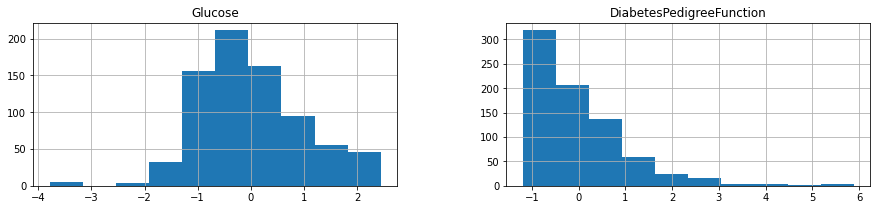

In [74]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

In [76]:
# 데이터를 다시 로드 후 index를 False로 지정하여 index를 없앤 후 저장
df.to_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv',index=False)

In [77]:
pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,100.3,4.618086,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,68.7,4.244200,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,100.3,4.618086,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
